# Imports & file locations

In [8]:
%load_ext autoreload
%autoreload 2

import itertools
import os

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
attr                19.3.0
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
idna                2.8
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
jinja2              2.10.3
joblib              0.14.1
jsonschema          3.2.0
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
nbformat            4.4.0
numba               

## Matplotlibrc

In [9]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

Overwriting matplotlibrc


## Output, input directories

In [10]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [11]:

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

GDRIVE_ANALYSIS_DIR = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

## Constants

In [12]:
groupby = "narrow_group"
species = "species"

tissue = "lung"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "differential-expression")

# Load data

In [13]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
! ls -lha $h5ad

-rw-r--r-- 1 olga czb 972M Jul 25 17:34 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__lung__preprocessed.h5ad
CPU times: user 1.32 ms, sys: 10.9 ms, total: 12.2 ms
Wall time: 126 ms


In [14]:
%%time

adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 417 ms, sys: 617 ms, total: 1.03 s
Wall time: 1.58 s


AnnData object with n_obs × n_vars = 82077 × 13056
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'channel_10x', 'compartment', 'method', 'species_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'lemur_name', 'lemur_renamed', 'cell_id_lemur_renamed', 'dendrogram_group'
    var: 'mouse_le

## Make CrossSpeciesComparison object

In [15]:
cross_species = xspecies.CrossSpeciesComparison(adata, "compartment_narrow")
# cross_species.plot_shared_cell_types()

compartment_narrow                           species    
endothelial: artery cell                     Mouse             95
                                             Mouse Lemur       78
                                             Human           1306
endothelial: capillary aerocyte cell         Mouse            512
                                             Mouse Lemur      818
                                             Human           3712
endothelial: capillary cell                  Mouse           1743
                                             Mouse Lemur     1011
                                             Human           5367
endothelial: lymphatic cell                  Mouse             40
                                             Mouse Lemur      228
                                             Human            422
endothelial: vein cell                       Mouse            306
                                             Mouse Lemur      124
                   

# Make dotplots

## Make mini adatas

In [21]:
cross_species.make_subset_adatas(do_pca_umap=False)


------- group: endothelial: artery cell -------
number of cells: 1479

------- group: endothelial: capillary aerocyte cell -------
number of cells: 5042

------- group: endothelial: capillary cell -------
number of cells: 8121

------- group: endothelial: lymphatic cell -------
number of cells: 690

------- group: endothelial: vein cell -------
number of cells: 1410

------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255

------- group: epithelial: ciliated cell -------
number of cells: 1368

------- group: lymphoid: B cell -------
number of cells: 1895

------- group: lymphoid: T cell (CD4+) -------
number of cells: 3860

------- group: lymphoid: T cell (CD8+) -------
number of cells: 3143

------- group: lymphoid: natural killer T cell -------
number of cells: 1187

------- group: lymphoid: natural killer cell -------
number of cells: 7894

------- group: lymphoid: natural killer cell_T cell (PF) -------
number of cells: 899

------- group: lymphoid

## Genes to plot for each celltyep

In [28]:
celltype_to_genes = {
    "epithelial: ciliated cell": ["SPATA4", "CIB1", "WDR38", "WDR54"],
    "myeloid: alveolar macrophage": ["C1QA", "C1QB", "CFD", "OSCAR", "IL4I1", "MME"],
    "endothelial: capillary aerocyte cell": ["ACE", "VIPR1"],
    "stromal: pericyte": ["NDRG1", "RGS5", "WFDC1"],
}

In [30]:
def sanitize(name):
    return name.replace(' ', '_').replace(':', '')

epithelial: ciliated cell
gene subset #1

------- group: epithelial: ciliated cell -------


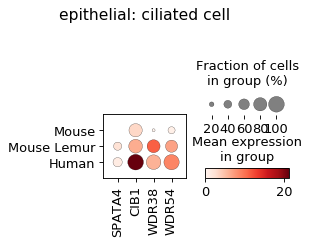

myeloid: alveolar macrophage
gene subset #1

------- group: myeloid: alveolar macrophage -------


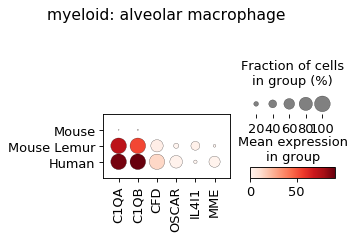

endothelial: capillary aerocyte cell
gene subset #1

------- group: endothelial: capillary aerocyte cell -------


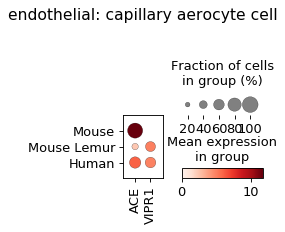

stromal: pericyte
gene subset #1

------- group: stromal: pericyte -------


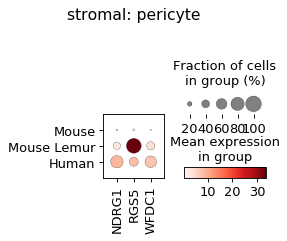

In [33]:
save_dir = f"{FIGURE_FOLDER}/dotplots-for-paper-july2021/"
! mkdir -p $save_dir
sc.settings.figdir = save_dir


for group, gene_names in celltype_to_genes.items():
    print(group)
    cross_species.dotplots(
        gene_names, select_group=group, save=sanitize(group), save_format="pdf"
    )